In [309]:
import gym
import sys
import numpy as np
import bottleneck as bn
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from tqdm import trange
from gym import Env, spaces, utils


In [310]:
env = gym.make('FrozenLake-v0')

In [311]:
def expected_Q(Q, epsilon, n_a):

    a = np.argmax(Q)
    E_Q = np.sum(np.multiply((epsilon/n_a),Q)) + (1 - epsilon)*Q[a]

    return E_Q

In [312]:
# initialize the agent’s Q-table to zeros
def init_q(s, a):
    """
    s: number of states
    a: number of actions
    """
    return np.zeros((s, a))

In [313]:
def e_greedy(no_a, e, q):
    """
    This function performs the epsilon greedy action selection
    no_a: No. of actions available
    e: Exploration parameter
    q: Action value function for the current state
    :return: epsilon greedy action
    """
    k = np.random.rand()
    if k < e:
        a = np.random.randint(0, no_a)
    else:
        a = np.argmax(q)
    return a

In [401]:
def ESARSA(alpha, gamma, epsilon,n_episodes, improved=0):
    """
    alpha: learning rate
    gamma: exploration parameter
    n_episodes: number of episodes
    improved: reward function changed and epsilon policy changed
    """
    # initialize Q table
    env = gym.make('FrozenLake-v0')
    n_states, n_actions = env.observation_space.n, env.action_space.n
    Q = init_q(n_states, n_actions)
    t = trange(n_episodes)
    reward_array = np.zeros(n_episodes)
    for i in t:
        # initial state
        s = env.reset()
        # initial action
        a = e_greedy(n_actions, epsilon, Q[s, :])
        done = False
        total_reward=0
    
        while not done:
            next_s, reward, done, info = env.step(a)

            next_a = e_greedy(n_actions, epsilon, Q[next_s, :])

            if improved:
              if next_s in (5,7,11,12):
                reward=-1
              elif next_s in (1,2,3,4,6,8,9,10,13,14):
                reward= 0.5

            total_reward += reward
            if done:
                Q[s, a] += alpha*(reward - Q[s, a])
            else:
                Q[s, a] += alpha*(reward + gamma*expected_Q(Q[next_s, :], epsilon, n_actions) - Q[s, a])

            if done:
                t.set_description('Episode {} Reward {}'.format(i + 1, reward))
                t.refresh()
                reward_array[i] = total_reward
                break
            s, a = next_s, next_a
        if improved:
            epsilon = epsilon - epsilon_dec
    env.close()
    return Q, reward_array

In [415]:
# experiment settings
alpha = 0.5 # learning rate
gamma = 0.9 # discount factor
epsilon=0.5 # exploration parameter
n_episodes = 1000 # number of training episodes
epsilon_dec = epsilon/(n_episodes//4)

In [416]:
epsilon_dec

0.002

In [418]:
# training
Q1, reward_array1 = ESARSA(alpha, gamma, epsilon, n_episodes)
Q2, reward_array2 = ESARSA(alpha, gamma, epsilon, n_episodes, improved=1)

Episode 798 Reward 0.5:  79%|███████▉  | 789/1000 [00:08<00:02, 103.61it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
Episode 1000 Reward 1.0: 100%|██████████| 1000/1000 [00:10<00:00, 99.92it/s] 


In [419]:
Q1

array([[9.70439808e-03, 9.53832613e-03, 9.24334885e-03, 9.61339957e-03],
       [7.63265862e-03, 6.86697859e-03, 9.96940177e-03, 1.36171333e-02],
       [1.58481841e-02, 1.40729390e-02, 1.71711361e-02, 1.56529121e-02],
       [7.70962938e-03, 7.17324035e-03, 2.84100213e-04, 1.26590840e-02],
       [9.21964138e-03, 2.59694321e-02, 9.34297426e-04, 3.45053868e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.45034112e-02, 1.45561707e-02, 6.90909446e-02, 3.74385713e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.61816188e-03, 3.12076906e-02, 4.44845381e-03, 1.26994178e-02],
       [7.87837211e-02, 1.18140825e-01, 4.62380259e-02, 1.00133432e-01],
       [1.55946262e-01, 2.52527878e-01, 1.63162762e-01, 9.04416212e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.59764560e-02, 9.04717541e-02, 9.45890812e

In [420]:
Q2

array([[ 2.33731267,  2.41999703,         nan,  2.4597962 ],
       [ 1.62496991,  1.4484637 ,  1.56166349,         nan],
       [ 1.11296407,  2.22139128,  2.16447365,         nan],
       [ 0.88297903,  1.07122868,  0.94522403,         nan],
       [        nan,  0.05671388,  1.30190949,  0.45495664],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [        nan, -0.86421357, -0.90070712, -0.86189315],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.92613363,  1.74061031,  0.6603521 ,         nan],
       [ 1.48710756,         nan,  1.511094  ,  0.31967537],
       [        nan, -0.32079317,  0.13213197,  0.16425167],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.65717753,  1.90756333,         nan,  0.65189194],
       [ 0.        ,  1.09887276,  1.08210351,         nan],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [421]:
# averaged reward per episode
avg_reward = round(np.mean(reward_array1), 4)
print('Averaged reward per episode for normal {}'.format(avg_reward))

Averaged reward per episode for normal 0.027


In [422]:
avg_reward = round(np.mean(reward_array2), 4)
print('Averaged reward per episode {}'.format(avg_reward))

Averaged reward per episode 22.8555


In [423]:
def rollavg_bottlneck(a,n):
    return bn.move_mean(a, window=n,min_count = None)

In [424]:
rewards_ma1=rollavg_bottlneck(reward_array1, 100)
rewards_ma2=rollavg_bottlneck(reward_array2, 100)

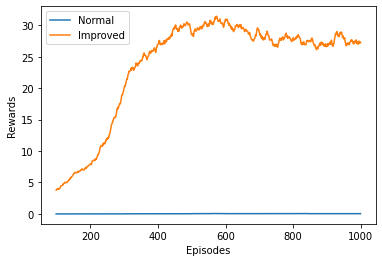

In [425]:
fig, ax = plt.subplots()
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards')
ax.plot(rewards_ma1, label='Normal')
ax.plot(rewards_ma2, label='Improved')
plt.legend()
plt.show()

In [426]:
def eva(Q, n_episodes):
    """
    Q: trained Q table
    n_episodes: number of episodes
    """
    t = trange(n_episodes)
    reward_array = np.zeros(n_episodes)
    for i in t:
        # initial state
        s = env.reset()
        # initial action
        a = np.argmax(Q[s])
        done = False
        while not done:
            s_, reward, done, _ = env.step(a)
            # pick an action according the state and trained Q table
            a_ = np.argmax(Q[s_])
            if done:
                t.set_description('Episode {} Reward {}'.format(i + 1, reward))
                t.refresh()
                reward_array[i] = reward
                break
            s, a = s_, a_
    env.close()
    return reward_array

In [427]:
eva(Q2,1000)

Episode 1000 Reward 0.0: 100%|██████████| 1000/1000 [00:05<00:00, 187.41it/s]


array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0.

In [433]:
done = False
s = env.reset()
env.render()
i=0
while not done:
   # pick an action
    a = np.argmax(Q1[s])
    # get feedback from the environment
    s_, _, done, _ = env.step(a)
    # show the environment
    env.render()
    s = s_
    i+=1

if s==15:
  print("Number of steps after which problem was solved:", i)
else:
  print("Problem not solved")


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Problem not solved


In [432]:
done = False
s = env.reset()
env.render()
i=0
while not done:
    # pick an action
    a = np.argmax(Q2[s])
    # get feedback from the environment
    s_, _, done, _ = env.step(a)
    # show the environment
    env.render()
    s = s_
    i=i+1
if s==15:
  print("Number of steps after which problem was solved:", i)
else:
  print("Problem not solved")


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
